# Data Cleaning

Data cleaning is the process of cleaning the data by fixing missing data and invalid data so that data analytics can be performed correctly

## Introduction to Missing Data

What does "missing data" mean? What is a missing value? It depends on the origin of the data and the context it was generated. For example, for a survey, a _`Salary`_ field with an empty value, or a number 0, or an invalid value (a string for example) can be considered "missing data". These concepts are related to the values that Python will consider "Falsy"(Python consider then as boolean `False`):

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
falsy_values = (0, False, None, '', [], {})
falsy_values

(0, False, None, '', [], {})

<a id="Falsy"></a>
For Python, all the values above are considered "falsy":

In [3]:
any(falsy_values)

False

Numpy has a special "nullable" value for numbers which is `np.nan`. It's _NaN_: "Not a number"

In [4]:
np.nan

nan

The `np.nan` value is kind of a virus. Everything that it touches becomes `np.nan`:

In [5]:
3 + np.nan

nan

In [6]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [7]:
a.sum()

nan

In [8]:
a.mean()

nan

This is better than regular `None` values, which in the previous examples would have raised an exception:

In [9]:
3 + None

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

For a numeric array, the `None` value is replaced by `np.nan`:

In [10]:
a = np.array([1, 2, 3, np.nan, None, 4], dtype='float')

In [11]:
a

array([ 1.,  2.,  3., nan, nan,  4.])

As we said, `np.nan` is like a virus. If you have any `nan` value in an array and you try to perform an operation on it, you'll get unexpected results:

In [12]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [13]:
a.mean()

nan

In [14]:
a.sum()

nan

Numpy also supports an "Infinite" type:

In [15]:
np.inf

inf

Which also behaves as a virus:

In [16]:
3 + np.inf

inf

In [17]:
np.inf / 3

inf

In [18]:
np.inf / np.inf

nan

In [19]:
b = np.array([1, 2, 3, np.inf, np.nan, 4], dtype=np.float)

In [20]:
b.sum()

nan

![separator1](https://i.imgur.com/ZUWYTii.png)

### Checking for `nan` or `inf`

There are two functions: `np.isnan` and `np.isinf` that will perform the desired checks:

In [21]:
np.isnan(np.nan)

True

In [22]:
np.isinf(np.inf)

True

And the joint operation can be performed with `np.isfinite`.

In [23]:
np.isfinite(np.nan), np.isfinite(np.inf)

(False, False)

`np.isnan` and `np.isinf` also take arrays as inputs, and return boolean arrays as results:

In [24]:
np.isnan(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False,  True, False, False])

In [25]:
np.isinf(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([False, False, False, False,  True, False])

In [26]:
np.isfinite(np.array([1, 2, 3, np.nan, np.inf, 4]))

array([ True,  True,  True, False, False,  True])

_Note: It's not so common to find infinite values. From now on, we'll keep working with only `np.nan`_

![separator1](https://i.imgur.com/ZUWYTii.png)

### Filtering them out

Whenever you're trying to perform an operation with a Numpy array and you know there might be missing values, you'll need to filter them out before proceeding, to avoid `nan` propagation. We'll use a combination of the previous `np.isnan` + boolean arrays for this purpose:

In [27]:
a = np.array([1, 2, 3, np.nan, np.nan, 4])

In [28]:
a[~np.isnan(a)]

array([1., 2., 3., 4.])

Which is equivalent to:

In [29]:
a[np.isfinite(a)]

array([1., 2., 3., 4.])

And with that result, all the operation can be now performed:

In [30]:
a[np.isfinite(a)].sum()

10.0

In [31]:
a[np.isfinite(a)].mean()

2.5

![separator2](https://i.imgur.com/4gX5WFr.png)

## Handling Missing Data with Pandas

pandas borrows all the capabilities from numpy selection + adds a number of convenient methods to handle missing values. Let's see one at a time:

### Pandas utility functions

Similarly to `numpy`, pandas also has a few utility functions to identify and detect null values. Both `isnull()` and `isna()` have same working and are synonym functions in pandas. Using any function is fine.

In [32]:
pd.isnull(np.nan)

True

In [33]:
pd.isnull(None)

True

In [34]:
pd.isna(np.nan)

True

In [35]:
pd.isna(None)

True

The opposite ones also exist. `notnull` and `notna` are synonym functions and behave in same manner.

In [36]:
pd.notnull(None)

False

In [37]:
pd.notnull(np.nan)

False

In [38]:
pd.notna(np.nan)

False

In [39]:
pd.notnull(3)

True

These functions also work with `Series` and `DataFrame`s. `isnull`  will return a boolean mask with `True` for values which are [Falsy](#Falsy) and `False` otherwise. Opposite behaviour is present when we call `notnull()`.

In [40]:
pd.Series([1, np.nan, 7])

0    1.0
1    NaN
2    7.0
dtype: float64

In [41]:
pd.isnull(pd.Series([1, np.nan, 7]))

0    False
1     True
2    False
dtype: bool

In [42]:
pd.notnull(pd.Series([1, np.nan, 7]))

0     True
1    False
2     True
dtype: bool

In [43]:
pd.isnull(pd.DataFrame({
    'Column A': [1, np.nan, 7],
    'Column B': [np.nan, 2, 3],
    'Column C': [np.nan, 2, np.nan]
}))

,Column A,Column B,Column C
0,False,True,True
1,True,False,False
2,False,False,True


![separator1](https://i.imgur.com/ZUWYTii.png)

### Pandas Operations with Missing Values

Pandas manages missing values more gracefully than numpy. `nan`s will no longer behave as "viruses", and operations will just ignore them completely:

In [44]:
pd.Series([1, 2, np.nan]).count()

2

In [45]:
pd.Series([1, 2, np.nan]).sum()

3.0

In [46]:
pd.Series([2, 2, np.nan]).mean()

2.0

### Filtering missing data

As we saw with numpy, we could combine boolean selection + `pd.isnull` to filter out those `nan`s and null values:

In [47]:
s = pd.Series([1, 2, 3, np.nan, np.nan, 4])

In [48]:
pd.notnull(s)

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [49]:
pd.isnull(s)

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In Python, we can sum the boolean values. `True` has value of `1` while `False` has value of `0`. Using this logic, we can identify how many null values are there. If we do `notnull()`, it will return a boolean Series with `True` for non null values as `False` for null values. We can then apply `.sum()` to the result to get the total number of not null values. Then we can identify how many null values or non null values we have in the dataset.

Similarly, we can also use the function `isnull()` which return `True` if a value is null and `False` otherwise and then use the `.sum()` to get the count of null values.

In [50]:
pd.notnull(s).sum()

4

In [51]:
pd.isnull(s).sum()

2

We can also use these function to get all null or non-null values from the Series or DataFrames(since `isnull` and `notnull` both return a boolean mask)

In [52]:
s[pd.notnull(s)]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

But both `notnull` and `isnull` are also methods of `Series` and `DataFrame`s, so we could use it that way:

In [53]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

In [54]:
s.notnull()

0     True
1     True
2     True
3    False
4    False
5     True
dtype: bool

In [55]:
s[s.notnull()]

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

![separator1](https://i.imgur.com/ZUWYTii.png)

### Dropping null values

Boolean selection + `notnull()` seems a little bit verbose and repetitive. And as we said before: any repetitive task will probably have a better, more DRY way. In this case, we can use the `dropna` method. `dropna` method will drop all the null values and return the object with all non null values. `dropna` does not modify the existing object but returns a new object.

In [56]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

In [57]:
s.dropna()

0    1.0
1    2.0
2    3.0
5    4.0
dtype: float64

In [58]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

### Dropping null values on DataFrames

You saw how simple it is to drop `na`s with a Series. But with `DataFrame`s, there will be a few more things to consider, because you can't drop single values. You can only drop entire columns or rows. Let's start with a sample `DataFrame`:

In [59]:
df = pd.DataFrame({
    'Column A': [1, np.nan, 30, np.nan],
    'Column B': [2, 8, 31, np.nan],
    'Column C': [np.nan, 9, 32, 100],
    'Column D': [5, 8, 34, 110],
})

In [60]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


To identify the null values in DataFrames, we first start by getting the `shape()` and the `info()` of the DataFrame to get the idea about the structure of the data set as well as how many null values are present in each column

In [61]:
df.shape

(4, 4)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Column A  2 non-null      float64
 1   Column B  3 non-null      float64
 2   Column C  3 non-null      float64
 3   Column D  4 non-null      int64  
dtypes: float64(3), int64(1)
memory usage: 256.0 bytes


We can see above that we have 2 non-null values in Column A, 3 non-null values in Column B & C and 4 values in Column D. Also we can see that there are 4 rows in the DataFrame(from the `RangeIndex` value) and accordingly identify the number of null values in each columns.

In [63]:
df.isnull()

,Column A,Column B,Column C,Column D
0,False,False,True,False
1,True,False,False,False
2,False,False,False,False
3,True,True,False,False


In [64]:
df.isnull().sum()

Column A    2
Column B    1
Column C    1
Column D    0
dtype: int64

By default, `dropna()` will drop all the rows in the DataFrame which have 1 or more null values.

In [65]:
df.dropna()

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


In this case we're dropping **rows**. Rows containing null values are dropped from the DF. You can also use the `axis` parameter to drop columns containing null values:

In [66]:
df.dropna(axis=1)  # axis='columns' also works

,Column D
0,5
1,8
2,34
3,110


In [67]:
df2 = pd.DataFrame({
    'Column A': [1, np.nan, 30],
    'Column B': [2, np.nan, 31],
    'Column C': [np.nan, np.nan, 100]
})

In [68]:
df2

,Column A,Column B,Column C
0,1.0,2.0,NaN
1,NaN,NaN,NaN
2,30.0,31.0,100.0


Using `dropna()` in default behaviour can be a bit extreme since it will drop all rows(or columns) having atleast 1 null value. We can also set a null value threshold, i.e., for how many null values in the row(or column) should the row(or column) be dropped. This behaviour is set using the parameter `how`. We can set `how='all'` to drop if all the values are null or `how='any'` if any of the values are null. `how='any'` is the default behaviour of `dropna()`

In [69]:
df.dropna(how='all')

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [70]:
df.dropna(how='any')  # default behavior

,Column A,Column B,Column C,Column D
2,30.0,31.0,32.0,34


You can also use the `thresh` parameter to indicate a _threshold_, a minimum number of non-null values for the row/column to be kept:

In [71]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [72]:
df.dropna(thresh=3)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34


In [73]:
df.dropna(thresh=3, axis='columns')

,Column B,Column C,Column D
0,2.0,NaN,5
1,8.0,9.0,8
2,31.0,32.0,34
3,NaN,100.0,110


![separator1](https://i.imgur.com/ZUWYTii.png)

### Filling null values

Sometimes instead than dropping the null values, we might need to replace them with some other value. This highly depends on the context and the dataset being worked upon. Depending on the context of data, we can replace the `nan` values with any fixed value(like `0`), some statistically calculated values like the `mean` of the dataset and other times we can take the closest value(any value above or below the nan data point). The value that we choose to fit for a particular missing point depends on context and the knowledge of the data structure and it is important to have some domain knowledge about the data on which we are working to be able to better fit the values.

In [74]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

Filling nulls with a arbitrary value like `0`

In [75]:
s.fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    4.0
dtype: float64

Filling null values with the `mean` value

In [76]:
s.fillna(s.mean())

0    1.0
1    2.0
2    3.0
3    2.5
4    2.5
5    4.0
dtype: float64

The `fillna()` is immutable funciton,i.e., it returns a new data object instead of modifying the existing one.

In [77]:
s

0    1.0
1    2.0
2    3.0
3    NaN
4    NaN
5    4.0
dtype: float64

We can also fill the mmissing values by using the values in close proximity to the null values(like some value above or below it). We do so by using the `method` argument. We can pass `method='ffill'`(forward fill) to forward fill the missing values,i.e., use the value of the row before(or above in case of column) the null value to fill the missing value with. We can also use `method='bfill'`(backward fill) to backward fill the missing values(reverse of forward fill), i.e., use the values of row or column after the null value to fill the missing value with.

In [78]:
s.fillna(method='ffill')

0    1.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
dtype: float64

In [79]:
s.fillna(method='bfill')

0    1.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
dtype: float64

This can still leave null values at the extremes of the Series/DataFrame:

In [80]:
pd.Series([np.nan, 3, np.nan, 9]).fillna(method='ffill')

0    NaN
1    3.0
2    3.0
3    9.0
dtype: float64

In [81]:
pd.Series([1, np.nan, 3, np.nan, np.nan]).fillna(method='bfill')

0    1.0
1    3.0
2    3.0
3    NaN
4    NaN
dtype: float64

### Filling null values on DataFrames

The `fillna` method also works on `DataFrame`s, and it works similarly. The main differences are that you can specify the `axis` (as usual, rows or columns) to use to fill the values (specially for methods) and that you have more control on the values passed:

In [82]:
df

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,NaN,8.0,9.0,8
2,30.0,31.0,32.0,34
3,NaN,NaN,100.0,110


In [83]:
df.fillna({'Column A': 0, 'Column B': 99, 'Column C': df['Column C'].mean()})

,Column A,Column B,Column C,Column D
0,1.0,2.0,47.0,5
1,0.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,0.0,99.0,100.0,110


We can define the axis we want to use while using `method` in `fillna()` function in DataFrame. `axis` will define whether we want to fill the missing values row wise or column wise. `axis=0` will fill the values column wise(top to bottom or bottom to top) and `axis=1` will fill the values row wise(left to right or right to left)

In [84]:
df.fillna(method='ffill', axis=0)

,Column A,Column B,Column C,Column D
0,1.0,2.0,NaN,5
1,1.0,8.0,9.0,8
2,30.0,31.0,32.0,34
3,30.0,31.0,100.0,110


In [85]:
df.fillna(method='ffill', axis=1)

,Column A,Column B,Column C,Column D
0,1.0,2.0,2.0,5.0
1,NaN,8.0,9.0,8.0
2,30.0,31.0,32.0,34.0
3,NaN,NaN,100.0,110.0


![separator1](https://i.imgur.com/ZUWYTii.png)

### Checking if there are NAs

The question is: Does this `Series` or `DataFrame` contain any missing value? The answer should be yes or no: `True` or `False`. How can you verify it?

#### **Method 1: Checking the length**

If there are missing values, `s.dropna()` will have less elements than `s`:

In [86]:
s.dropna().count()

4

In [87]:
len(s)

6

In [88]:
len(s.dropna())

4

In [89]:
missing_values = len(s.dropna()) != len(s)
missing_values

True

Since there are missing values in the dataset(the count of number of values is greater than number of values after dropping na), we got `True` when checking that the length of both are same or not.

There's also a `count` method, that excludes `nan`s from its result:

In [90]:
len(s)

6

In [91]:
s.count()

4

So we could just do:

In [92]:
missing_values = s.count() != len(s)
missing_values

True

#### **Method 2: More Pythonic solution `any`**

The methods `any` and `all` check if either there's `any` True value in a Series or `all` the values are `True`. They work in the same way as in Python:

In [93]:
pd.Series([True, False, False]).any()

True

In [94]:
pd.Series([True, False, False]).all()

False

In [95]:
pd.Series([True, True, True]).all()

True

The `isnull()` method returned a Boolean `Series` with `True` values wherever there was a `nan`:

In [96]:
s.isnull()

0    False
1    False
2    False
3     True
4     True
5    False
dtype: bool

So we can just use the `any` method with the boolean array returned:

In [97]:
pd.Series([1, np.nan]).isnull().any()

True

In [98]:
pd.Series([1, 2]).isnull().any()

False

In [99]:
s.isnull().any()

True

A more strict version would check only the `values` of the Series:

In [100]:
s.isnull().values

array([False, False, False,  True,  True, False])

In [101]:
s.isnull().values.any()

True

![separator2](https://i.imgur.com/4gX5WFr.png)

## Cleaning not-null values

We previouly saw that when there is data missing from the dataset, i.e, we have `np.nan` values in the datasets, we can easily identify(using method like `isnull`) and fill/drop the missing values(using functions like `fillna` or `dropna`) and hence deal with these problems in a straight forward manner.

But sometimes, there are values in the dataset which are not missing but are invalid in nature(like some particular attirbute value is not possible, or there is an outlier value, etc).

In [102]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'D', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,D,290
4,?,25


The previous `DataFrame` doesn't have any "missing value", but clearly has invalid data. `290` doesn't seem like a valid age, and `D` and `?` don't correspond with any known sex category. How can you clean these not-missing, but clearly invalid values then?

### Finding Unique Values

The first step to clean invalid values is to **notice** them, then **identify** them and finally handle them appropriately (remove them, replace them, etc). Usually, for a "categorical" type of field (like Sex, which only takes values of a discrete set `('M', 'F')`), we start by analyzing the variety of values present. For that, we use the `unique()` method. The `unique()` methods returns all the unique values present in the dataobject(including `nan`):

In [103]:
df['Sex'].unique()

array(['M', 'F', 'D', '?'], dtype=object)

The function `value_count()` returns the count of each unique value, i.e., how many datapoints we have for each of the value type present(which we can also get from `unique()` function)

In [104]:
df['Sex'].value_counts()

F    2
D    1
?    1
M    1
Name: Sex, dtype: int64

Clearly if you see values like `'D'` or `'?'`, it'll immediately raise your attention. Now, what to do with them? Let's say you picked up the phone, called the survey company and they told you that `'D'` was a typo and it should actually be `F`. You can use the `replace` function to replace these values:

In [105]:
df['Sex'].replace('D', 'F')

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

It can accept a dictionary of values to replace. For example, they also told you that there might be a few `'N's`, that should actually be `'M's`:

In [106]:
df['Sex'].replace({'D': 'F', 'N': 'M'})

0    M
1    F
2    F
3    F
4    ?
Name: Sex, dtype: object

If you have many columns to replace, you could apply it at "DataFrame level":

In [107]:
df.replace({
    'Sex': {
        'D': 'F',
        'N': 'M'
    },
    'Age': {
        290: 29
    }
})

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,29
4,?,25


In the previous example, I explicitly replaced 290 with 29 (assuming it was just an extra 0 entered at data-entry phase). But what if you'd like to remove all the extra 0s from the ages columns? (example, `150 > 15`, `490 > 49`).

The first step would be to just set the limit of the "not possible" age. Is it 100? 120? Let's say that anything above 100 isn't credible for **our** dataset. We can then combine boolean selection with the operation:

In [108]:
df = pd.DataFrame({
    'Sex': ['M', 'F', 'F', 'F', '?'],
    'Age': [29, 30, 24, 290, 25],
})
df

,Sex,Age
0,M,29
1,F,30
2,F,24
3,F,290
4,?,25


In [109]:
df[df['Age'] > 100]

,Sex,Age
3,F,290


And we can now just divide by 10:

In [110]:
df.loc[df['Age'] > 100, 'Age'] / 10

3    29.0
Name: Age, dtype: float64

In [111]:
df.loc[df['Age'] > 100, 'Age'] = df.loc[df['Age'] > 100, 'Age'] / 10

In [112]:
df

,Sex,Age
0,M,29.0
1,F,30.0
2,F,24.0
3,F,29.0
4,?,25.0


![separator1](https://i.imgur.com/ZUWYTii.png)

### Duplicates

Checking duplicate values is extremely simple. It'll behave differently between Series and DataFrames. Let's start with Series. As an example, let's say we're throwing a fancy party and we're inviting Ambassadors from Europe. But can only invite one ambassador per country. This is our original list, and as you can see, both the UK and Germany have duplicated ambassadors:

In [113]:
ambassadors = pd.Series([
    'France',
    'United Kingdom',
    'United Kingdom',
    'Italy',
    'Germany',
    'Germany',
    'Germany',
], index=[
    'Gérard Araud',
    'Kim Darroch',
    'Peter Westmacott',
    'Armando Varricchio',
    'Peter Wittig',
    'Peter Ammon',
    'Klaus Scharioth '
])

In [114]:
ambassadors

Gérard Araud                  France
Kim Darroch           United Kingdom
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
Peter Ammon                  Germany
Klaus Scharioth              Germany
dtype: object

The two most important methods to deal with duplicates are `duplicated` (that will tell you which values are duplicates) and `drop_duplicates` (which will just get rid of duplicates):

In [115]:
ambassadors.duplicated()

Gérard Araud          False
Kim Darroch           False
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig          False
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

In this case `duplicated` didn't consider `'Kim Darroch'`, the first instance of the United Kingdom or `'Peter Wittig'` as duplicates. That's because, by default, it'll consider the first occurrence of the value as not-duplicate. You can change this behavior with the `keep` parameter:

In [116]:
ambassadors.duplicated(keep='last')

Gérard Araud          False
Kim Darroch            True
Peter Westmacott      False
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth       False
dtype: bool

In this case, the result is "flipped", `'Kim Darroch'` and `'Peter Wittig'` (the first ambassadors of their countries) are considered duplicates, but `'Peter Westmacott'` and `'Klaus Scharioth'` are not duplicates. You can also choose to mark all of them as duplicates with `keep=False`. `keep=False` will mark all the values as duplicates if there are 2 or more duplicate values(contrary to default behaviour or `keep='last'` which will mark first(or last) occurance as non duplicate and rest as duplicate):

In [117]:
ambassadors.duplicated(keep=False)

Gérard Araud          False
Kim Darroch            True
Peter Westmacott       True
Armando Varricchio    False
Peter Wittig           True
Peter Ammon            True
Klaus Scharioth        True
dtype: bool

A similar method is `drop_duplicates`, which just excludes the duplicated values and also accepts the `keep` parameter:

In [118]:
ambassadors.drop_duplicates()

Gérard Araud                  France
Kim Darroch           United Kingdom
Armando Varricchio             Italy
Peter Wittig                 Germany
dtype: object

In [119]:
ambassadors.drop_duplicates(keep='last')

Gérard Araud                  France
Peter Westmacott      United Kingdom
Armando Varricchio             Italy
Klaus Scharioth              Germany
dtype: object

In [120]:
ambassadors.drop_duplicates(keep=False)

Gérard Araud          France
Armando Varricchio     Italy
dtype: object

### Duplicates in DataFrames

Conceptually speaking, duplicates in a DataFrame happen at "row" level. Two rows with exactly the same values are considered to be duplicates:

In [121]:
players = pd.DataFrame({
    'Name': [
        'Kobe Bryant',
        'LeBron James',
        'Kobe Bryant',
        'Carmelo Anthony',
        'Kobe Bryant',
    ],
    'Pos': [
        'SG',
        'SF',
        'SG',
        'SF',
        'SF'
    ]
})

In [122]:
players

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
2,Kobe Bryant,SG
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In the previous DataFrame, we clearly see that `Kobe bryant` value under `Name` column is duplicated; but he appears with two different positions(values `SG` and `SF` in `Pos` Column). We can call `duplicated` method to check the duplicate values. It will work in same way by default as for series, i.e., first matching value will not be considered duplicate but consecutive ones will be considered duplicate.

In [123]:
players.duplicated()

0    False
1    False
2     True
3    False
4    False
dtype: bool

"duplicated" for a DataFrame means "all the column values should be duplicates"(if 2 rows are exact copy of each other, it is duplicated).

We can also look for duplicate values in specific column(s) using the `subset` attribute. We pass the column names in `[]` to the `subset` attribute which we want to consider while checking for duplicate values. When passed, the `duplicated` method will check whether any rows are same or not for the subset of columns.

In [124]:
players.duplicated(subset=['Name'])

0    False
1    False
2     True
3    False
4     True
dtype: bool

And the same rules of `keep` still apply:

In [125]:
players.duplicated(subset=['Name'], keep='last')

0     True
1    False
2     True
3    False
4    False
dtype: bool

`drop_duplicates` takes the same parameters:

In [126]:
players.drop_duplicates()

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


In [127]:
players.drop_duplicates(subset=['Name'])

,Name,Pos
0,Kobe Bryant,SG
1,LeBron James,SF
3,Carmelo Anthony,SF


In [128]:
players.drop_duplicates(subset=['Name'], keep='last')

,Name,Pos
1,LeBron James,SF
3,Carmelo Anthony,SF
4,Kobe Bryant,SF


![separator1](https://i.imgur.com/ZUWYTii.png)

### Text Handling

Cleaning text values can be incredibly hard. Invalid text values involves, 99% of the time, mistyping, which is completely unpredictable and doesn't follow any pattern. Thankfully, it's not so common these days, where data-entry tasks have been replaced by machines. Still, let's explore the most common cases:

#### Splitting Columns

The result of a survey is loaded and this is what you get:

In [129]:
df = pd.DataFrame({
    'Data': [
        '1987_M_US _1',
        '1990?_M_UK_1',
        '1992_F_US_2',
        '1970?_M_   IT_1',
        '1985_F_I  T_2'
]})

In [130]:
df

,Data
0,1987_M_US _1
1,1990?_M_UK_1
2,1992_F_US_2
3,1970?_M_ IT_1
4,1985_F_I T_2


In pandas, the Series and DataFrames can habe dtype other than int or float, like object for string, datetime, etc. Some of the dtype like object and datetime(along with others) have some special attributes and functions reserved for them that we can use when we have a dataset with that dtype.

In case of string, the Series and DataFrames have an attribute called `str`(it is called differently for different dtype). The `str` attributes contains some string based functions, i.e., functions that we can perform on strings. Some of these functions are `split`, `contains`, `strip` and `replace`.

You know that the single columns represent the values "year, Sex, Country and number of children", but it's all been grouped in the same column and separated by an underscore. Pandas has a convenient method named `split` that we can use in these situations. The split function will break the string into two parts wherever it finds the matching string pattern/regex that has been proivided as input and convert the string to an array where the elements are the seperated strings. The string pattern/regex is not part of the output

In [131]:
df['Data'].str.split('_')

0       [1987, M, US , 1]
1       [1990?, M, UK, 1]
2        [1992, F, US, 2]
3    [1970?, M,    IT, 1]
4      [1985, F, I  T, 2]
Name: Data, dtype: object

If we want to spread the elements of the array into multiple column values, we can add the parameter `expand=True`

In [132]:
df['Data'].str.split('_', expand=True)

,0,1,2,3
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


In [133]:
df = df['Data'].str.split('_', expand=True)

In [134]:
df.columns = ['Year', 'Sex', 'Country', 'No Children']

In [135]:
df

,Year,Sex,Country,No Children
0,1987,M,US,1
1,1990?,M,UK,1
2,1992,F,US,2
3,1970?,M,IT,1
4,1985,F,I T,2


You can also check which columns contain a given value with the `contains` method:

In [136]:
df['Year'].str.contains('\?')

0    False
1     True
2    False
3     True
4    False
Name: Year, dtype: bool

[`contains`](http://pandas.pydata.org/pandas-docs/version/0.22.0/generated/pandas.Series.str.contains.html) takes a regex/pattern as first value, so we need to escape the `?` symbol as it has a special meaning for these patterns. Regular letters don't need escaping:

In [137]:
df['Country'].str.contains('U')

0     True
1     True
2     True
3    False
4    False
Name: Country, dtype: bool

Removing blank spaces (like in `'US '` or `'I  T'` can be achieved with `strip` (`lstrip` and `rstrip` also exist) or just `replace`:

In [138]:
df['Country'].str.strip()

0      US
1      UK
2      US
3      IT
4    I  T
Name: Country, dtype: object

In [139]:
df['Country'].str.replace(' ', '')

0    US
1    UK
2    US
3    IT
4    IT
Name: Country, dtype: object

As we said, `replace` and `contains` take regex patterns, which can make it easier to replace values in bulk:

In [140]:
df['Year'].str.replace(r'(?P<year>\d{4})\?', lambda m: m.group('year'))

0    1987
1    1990
2    1992
3    1970
4    1985
Name: Year, dtype: object

But, be warned:

> Some people, when confronted with a problem, think "I know, I'll use regular expressions." Now they have two problems.

As you can see, all these string/text-related operations are applied over the `str` attribute of the series. That's because they have a special place in Series handling and you can read more about it [here](https://pandas.pydata.org/pandas-docs/stable/text.html).

![separator2](https://i.imgur.com/4gX5WFr.png)

## Visualizations

Apart from just staistically and mathematically evaluating the data, it is also helpful when we can visually __see__ the data to understand it better. That's where the matplotlib comes into picture. matplotlib is a library which can provide graphical representation to the the data through the usage of many available graphs and charts and allowing us to __plot__ the data in those graphs and charts. The `plot` function of pandas library also uses matplotlib library internally.

In matplotlib, we have 2 ways to create plots, using the Global API and using OOP Interface - 
* [Global API](https://matplotlib.org/api/index.html#the-pyplot-api) is basically when we import pyplot(`import matplotlib.pyplot as plt`), we directly use the plt object to create our figure, plot, adding labels and titles to it, etc. This way has the problem that we are directly changing the state of the globally available instance of the `plt` object and any functions we call of `pyplot` which are not immutable are essentially changing certain attributes of the `plt` object. So if we create multiple plots in out program, the sequence of steps becomes very important since each is having some impcat on the global state and as such is not highly modular and prone to mistakes.
* [OOP Interface](https://matplotlib.org/api/index.html#the-object-oriented-api) is when we are creating `subplot` objects from the `plt` object and then modifying the `subplot` objects to plot our data. These changes do not cause any impact on the global object and we can create as many `sublot` objects as we want and all of then will independently maintain their state. This allows to easily manage our plots as well as being sure that alteration in attribute of 1 plot will not impact another.

### API Overview

#### Global API

Matplotlib's default pyplot API has a global, MATLAB-style interface :

In [141]:
x = np.arange(-10, 11)

In a basic plot, we specify the following things -
* `figure` - This is used to create a new figure. A figure is basically where the plot al well as other operations will be performed in. We can pass `figsize` to set the width and height(in inches) for the figure
* `title` - This is the title name of the plot we want to give to make the plot more expressive
* `plot` - plot function is used to plot the actual data. In this, we pass the values we want to set in the x-axis and the y-axis

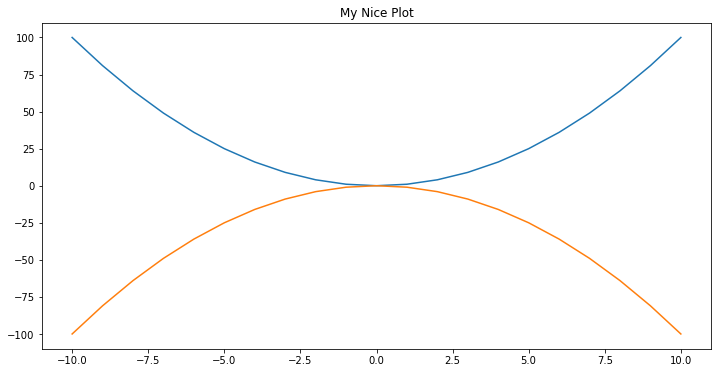

In [142]:
plt.figure(figsize=(12, 6))

plt.title('My Nice Plot')

plt.plot(x, x ** 2)
plt.plot(x, -1 * (x ** 2))


We can also plot multiple graphs in a single figure by using the function `subplot` 

Text(0, 0.5, 'X Squared')

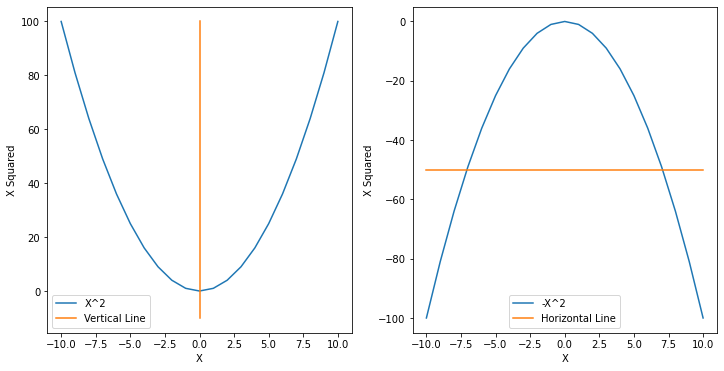

In [143]:
plt.figure(figsize=(12, 6))
plt.title('My Nice Plot')

plt.subplot(1, 2, 1)  # rows, columns, panel selected
plt.plot(x, x ** 2)
plt.plot([0, 0, 0], [-10, 0, 100])
plt.legend(['X^2', 'Vertical Line'])
plt.xlabel('X')
plt.ylabel('X Squared')

plt.subplot(1, 2, 2)
plt.plot(x, -1 * (x ** 2))
plt.plot([-10, 0, 10], [-50, -50, -50])
plt.legend(['-X^2', 'Horizontal Line'])

plt.xlabel('X')
plt.ylabel('X Squared')

#### OOP Interface
In OOP Interface, as we saw, we create `subplots`. The `subplot` function creates a figure and as many subplots as we want in that figure. It returns 2 objects, `fig` and `axes`. The `fig` is the [figure](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure) object of the subplot and the `axes` is an object or array of [axes](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes) objects(it will be an array in case we want to create multiple different graphs in a single figure. We will see more examples below)

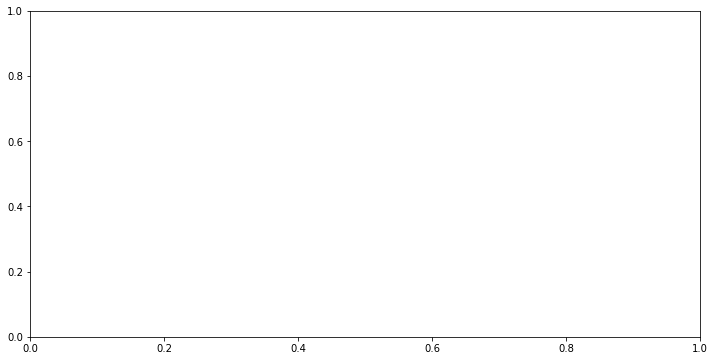

In [144]:
fig, axes = plt.subplots(figsize=(12, 6))

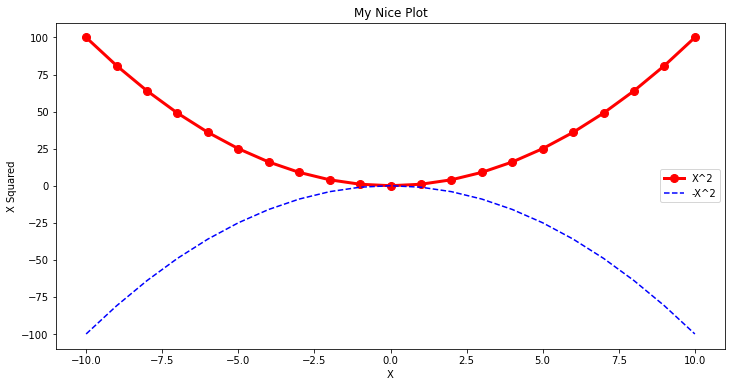

In [145]:
axes.plot(
    x, (x ** 2), color='red', linewidth=3,
    marker='o', markersize=8, label='X^2')

axes.plot(x, -1 * (x ** 2), 'b--', label='-X^2')

axes.set_xlabel('X')
axes.set_ylabel('X Squared')

axes.set_title("My Nice Plot")

axes.legend()

fig

Text(0.5, 1.0, 'My Nice Plot')

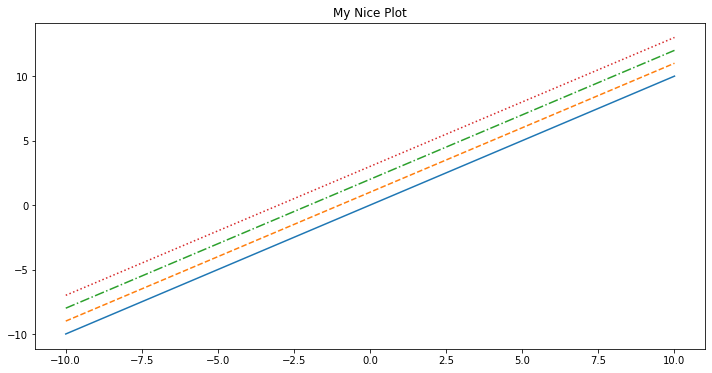

In [146]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, linestyle='solid')
axes.plot(x, x + 1, linestyle='dashed')
axes.plot(x, x + 2, linestyle='dashdot')
axes.plot(x, x + 3, linestyle='dotted');

axes.set_title("My Nice Plot")

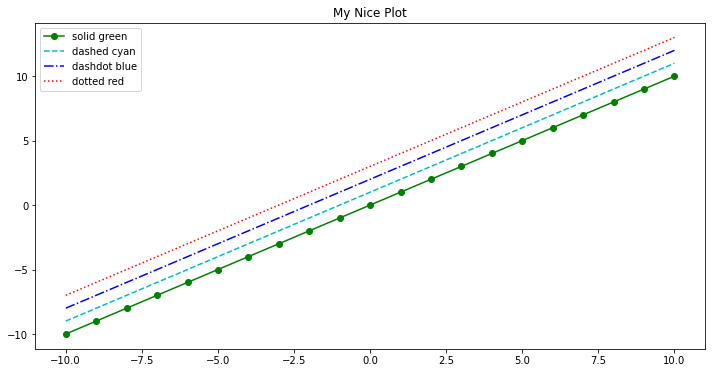

In [147]:
fig, axes = plt.subplots(figsize=(12, 6))

axes.plot(x, x + 0, '-og', label="solid green")
axes.plot(x, x + 1, '--c', label="dashed cyan")
axes.plot(x, x + 2, '-.b', label="dashdot blue")
axes.plot(x, x + 3, ':r', label="dotted red")

axes.set_title("My Nice Plot")

axes.legend()

There are a lot of line and marker types.

In [148]:
print('Markers: {}'.format([m for m in plt.Line2D.markers]))

Markers: ['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


In [149]:
linestyles = ['_', '-', '--', ':']

print('Line styles: {}'.format(linestyles))

Line styles: ['_', '-', '--', ':']


![separator1](https://i.imgur.com/ZUWYTii.png)

### Different types of plots

#### Figures and subfigures

When we call the `subplots()` function we get a tuple containing a `Figure` and a `axes` element.

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f50b6603c10>)

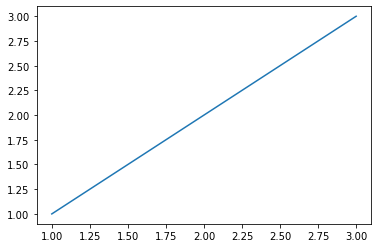

In [150]:
plot_objects = plt.subplots()

fig, ax = plot_objects

ax.plot([1,2,3], [1,2,3])

plot_objects

We can also define how many elements we want inside our figure. To do that we can set the `nrows` and `ncols` params.

(<Figure size 1008x432 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f50b6432690>,
       dtype=object))

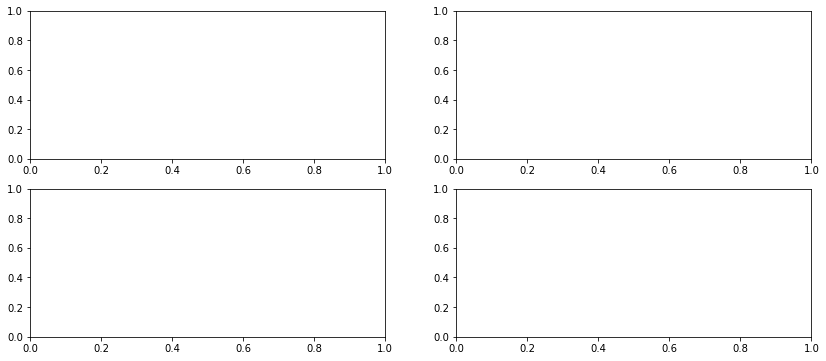

In [151]:
plot_objects = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))

fig, ((ax1, ax2), (ax3, ax4)) = plot_objects

plot_objects

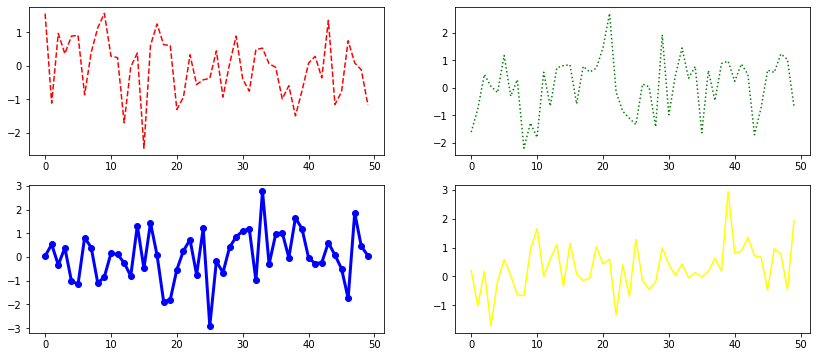

In [152]:
ax4.plot(np.random.randn(50), c='yellow')
ax1.plot(np.random.randn(50), c='red', linestyle='--')
ax2.plot(np.random.randn(50), c='green', linestyle=':')
ax3.plot(np.random.randn(50), c='blue', marker='o', linewidth=3.0)


fig

##### The `subplot2grid` command

There is another way to make subplots using a grid-like format:

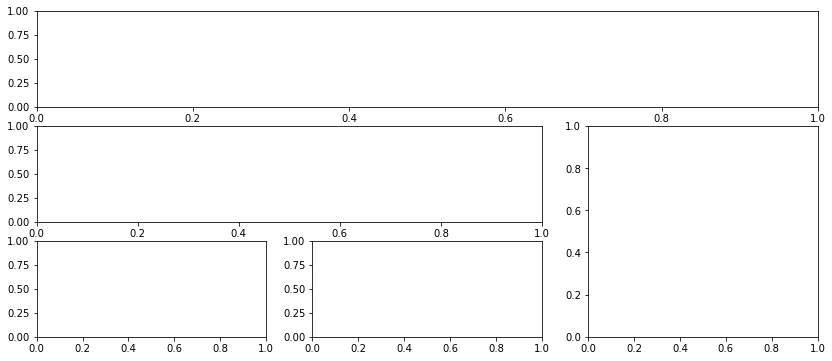

In [153]:
plt.figure(figsize=(14, 6))

ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1,2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2,0))
ax5 = plt.subplot2grid((3,3), (2,1))

#### Scatter Plot

In [154]:
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (20 * np.random.rand(N))**2  # 0 to 15 point radii

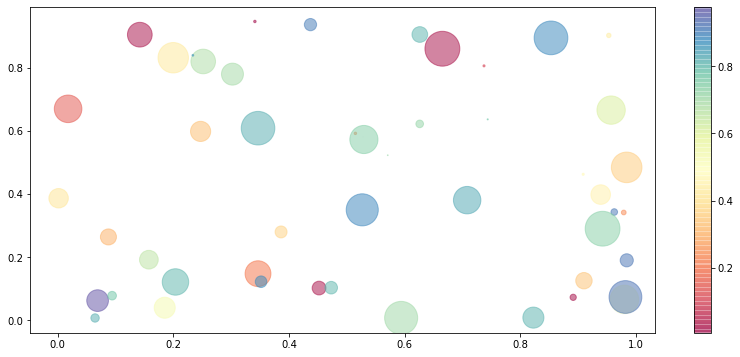

In [155]:
plt.figure(figsize=(14, 6))

plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Spectral')
plt.colorbar()

plt.show()

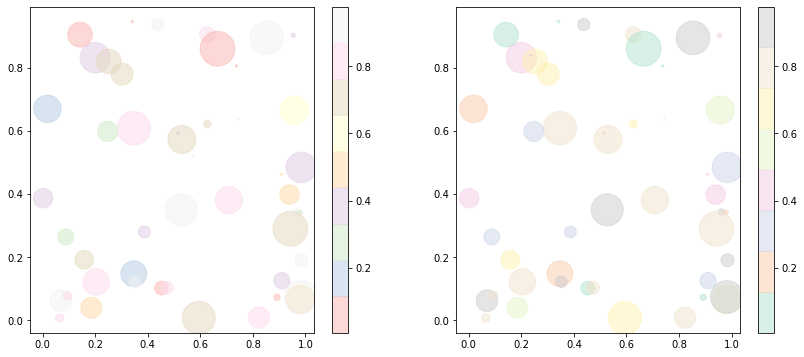

In [156]:
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(1,2,1)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel1')
plt.colorbar()

ax2 = fig.add_subplot(1,2,2)
plt.scatter(x, y, s=area, c=colors, alpha=0.5, cmap='Pastel2')
plt.colorbar()

plt.show()

Here is the full `cmap` options available: https://matplotlib.org/users/colormaps.html

#### Histograms

In [157]:
values = np.random.randn(1000)

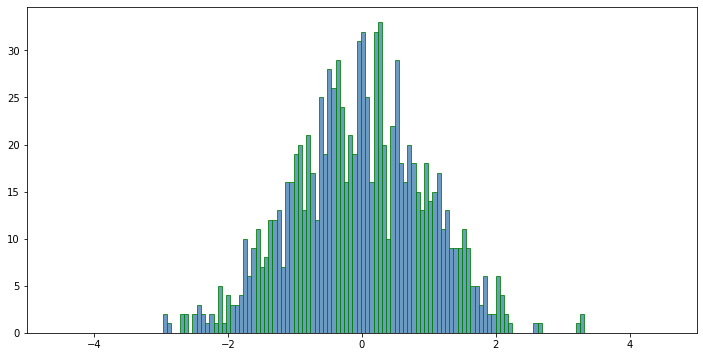

In [158]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8,
          histtype='bar', color='steelblue',
          edgecolor='green')
plt.xlim(xmin=-5, xmax=5)

plt.show()

In [159]:
fig.savefig('hist.png')

#### KDE (kernel density estimation)

In [160]:
from scipy import stats

density = stats.kde.gaussian_kde(values)
density

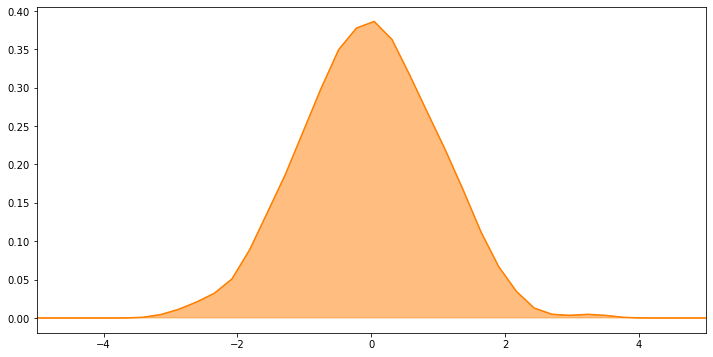

In [161]:
plt.subplots(figsize=(12, 6))

values2 = np.linspace(min(values)-10, max(values)+10, 100)

plt.plot(values2, density(values2), color='#FF7F00')
plt.fill_between(values2, 0, density(values2), alpha=0.5, color='#FF7F00')
plt.xlim(xmin=-5, xmax=5)

plt.show()

#### Combine plots

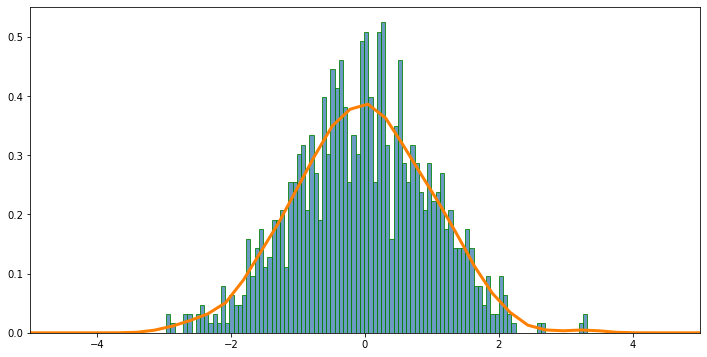

In [162]:
plt.subplots(figsize=(12, 6))

plt.hist(values, bins=100, alpha=0.8, density=1,
          histtype='bar', color='steelblue',
          edgecolor='green')

plt.plot(values2, density(values2), color='#FF7F00', linewidth=3.0)
plt.xlim(xmin=-5, xmax=5)

plt.show()

#### Bar plots

In [163]:
Y = np.random.rand(1, 5)[0]
Y2 = np.random.rand(1, 5)[0]

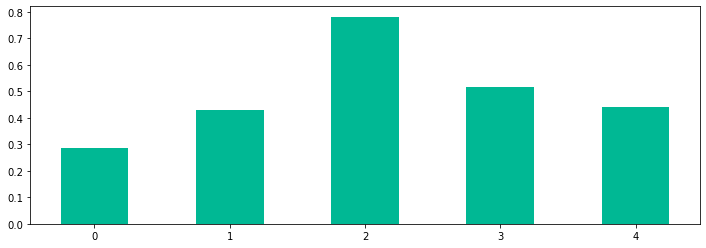

In [164]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894')

plt.show()

Also can be stacked bars, and add a legend to the plot:

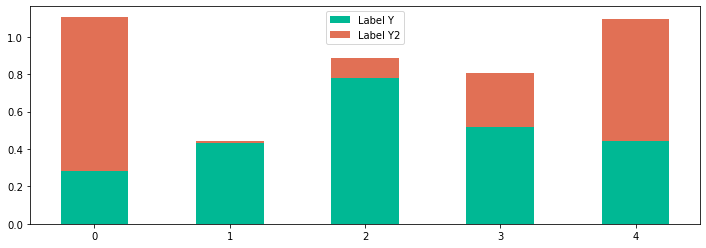

In [165]:
plt.figure(figsize=(12, 4))

barWidth = 0.5
plt.bar(np.arange(len(Y)), Y, width=barWidth, color='#00b894', label='Label Y')
plt.bar(np.arange(len(Y2)), Y2, width=barWidth, color='#e17055', bottom=Y, label='Label Y2')

plt.legend()
plt.show()

#### Boxplots and outlier detection

In [166]:
values = np.concatenate([np.random.randn(10), np.array([10, 15, -10, -15])])

(array([1., 1., 0., 0., 5., 5., 0., 0., 1., 1.]),
 array([-15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,  12.,  15.]),
 <a list of 10 Patch objects>)

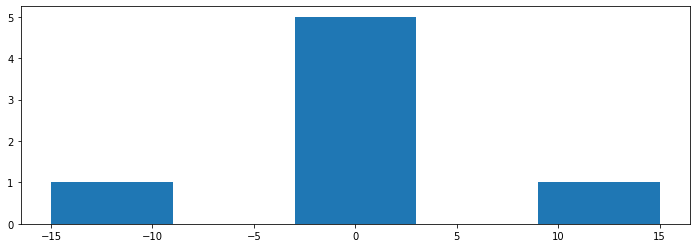

In [167]:
plt.figure(figsize=(12, 4))

plt.hist(values)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f50b41f6810>,
 'caps': [<matplotlib.lines.Line2D at 0x7f50b41fa2d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f50b41f6250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f50b41fad90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f50b4201310>],
 'means': []}

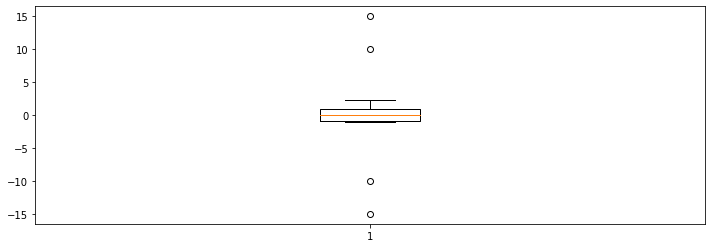

In [168]:
plt.figure(figsize=(12, 4))

plt.boxplot(values)

![separator2](https://i.imgur.com/4gX5WFr.png)

## Exercise

### Introduction to exercise

Let's get started by importing Bitcoin and Ether data:

In [169]:
df = pd.read_csv(
    'data/btc-eth-prices-outliers.csv',
    index_col=0,
    parse_dates=True
)

In [170]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


And now we can run a simple visualization:

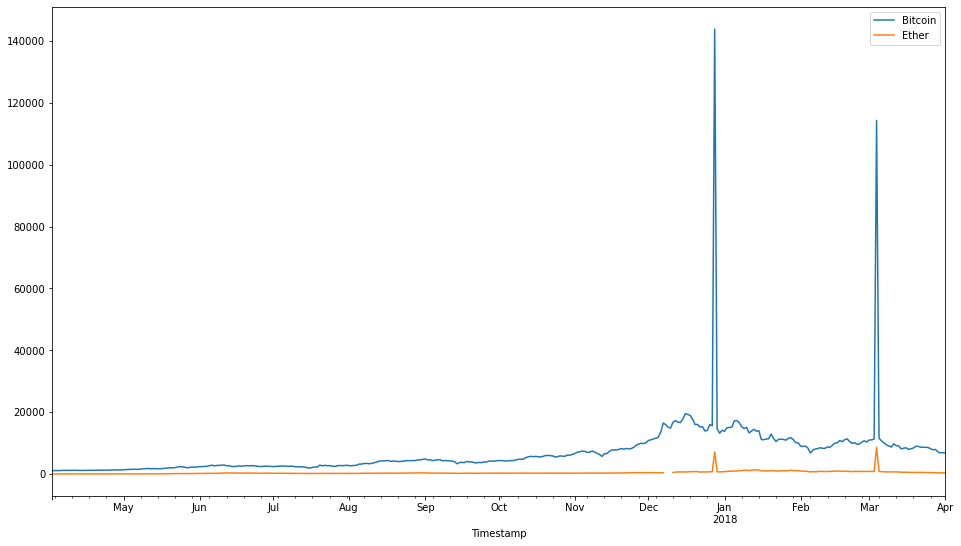

In [171]:
df.plot(figsize=(16, 9))

There are clearly some invalid values, both ETH and BTC have huge spikes. On top of that, there seems to be some data missing in Ether between December 2017 and and January 2018:

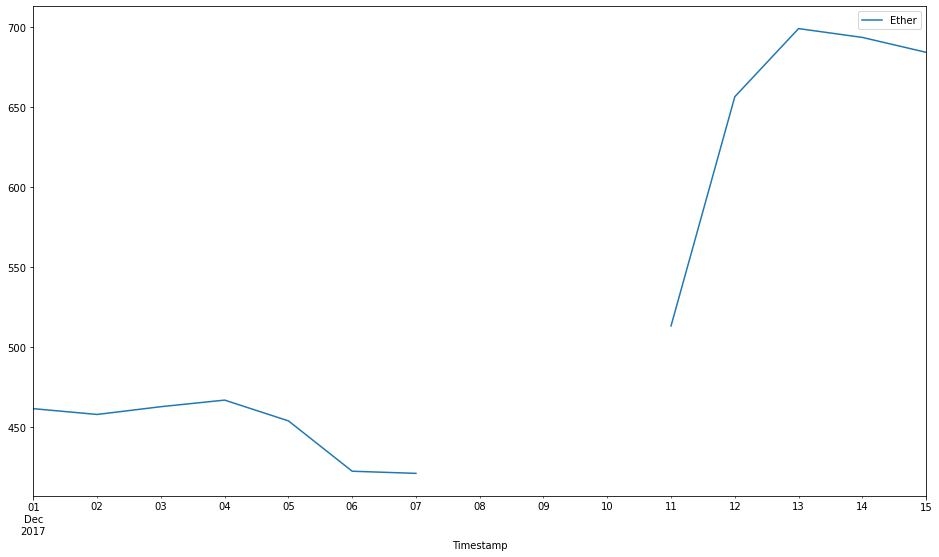

In [172]:
df.loc['2017-12': '2017-12-15'].plot(y='Ether', figsize=(16, 9))

In [173]:
df_na = df.loc['2017-12': '2017-12-15']

Are those null values?

In [174]:
df_na['Ether'].isna().values.any()

True

When? what periods of time?

In [175]:
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


Let's add a little bit more context:

In [176]:
df.loc['2017-12-06': '2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


We now need to decide what we'll do with the missing values. Drop them? fill them? If we decide to fill them, what will be use as fill value? For example: we can use the previous value and just assume the price stayed the same.

In [177]:
df.loc['2017-12-06': '2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [178]:
df.fillna(method='bfill', inplace=True)

Let's take a look now:

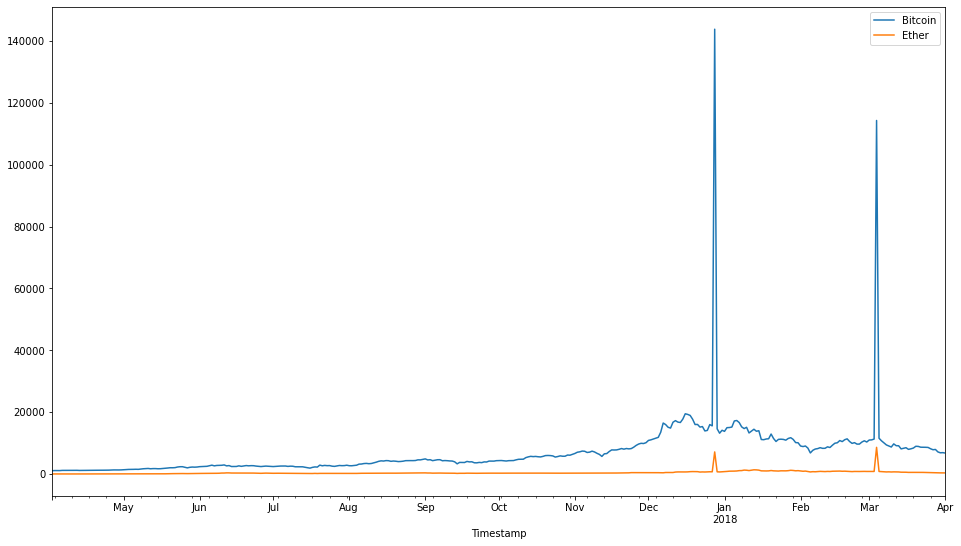

In [179]:
df.plot(figsize=(16, 9))

Much better. We now need to fix the huge spikes. The first step is identifying them. How can we do it? The simple answer is of course visually. They seem to be located in the last 10 days of Dec 2017 and first of March 2018:

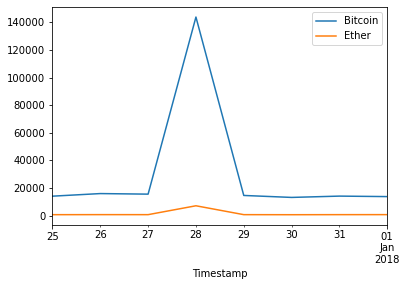

In [180]:
df['2017-12-25':'2018-01-01'].plot()

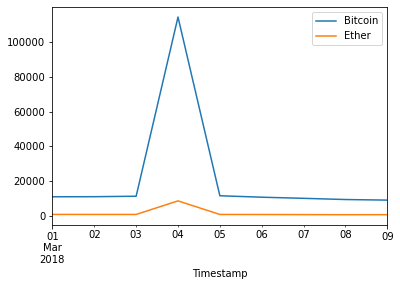

In [181]:
df['2018-03-01': '2018-03-09'].plot()

Apparently, they're located in '2017-12-28' and '2018-03-04':

In [182]:
df_cleaned = df.drop(pd.to_datetime(['2017-12-28', '2018-03-04']))

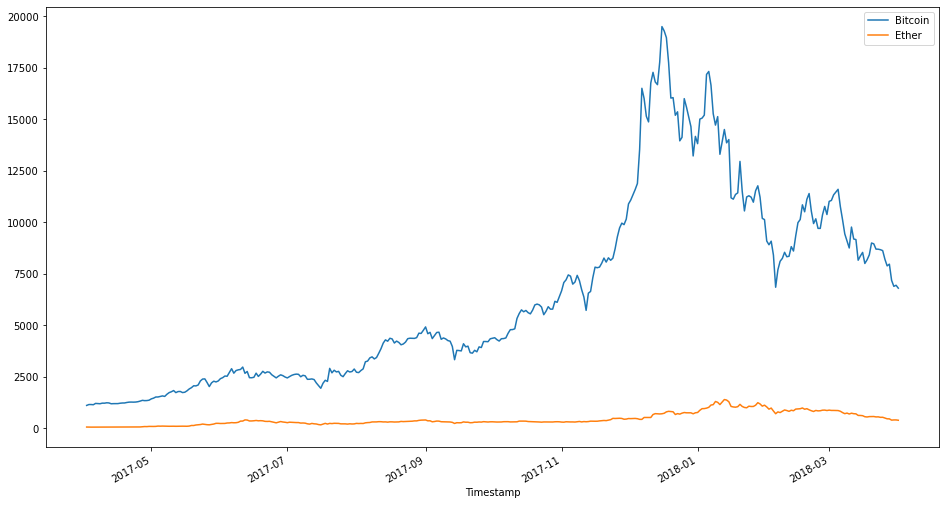

In [183]:
df_cleaned.plot(figsize=(16, 9))

Now it looks much better. Our data seems to be clean.

### Cleaning Analysis 

Visualizations helps make sense of the data and let us judge if our analysis and work is on the right track. But we need a more powerful method to handle our data. That's what we call "analysis". We'll use _analytical_ methods to identify these outliers or these skewed values.

#### Central Tendency

We'll use a set of common indicators of to measure central tendency and identify these outliers:

##### mean
The mean is probably the most common and popular one. The problem is that it's really sensitive to outliers. The mean of our dataset with invalid values is:

In [184]:
df.mean()

Bitcoin    6996.004022
Ether       469.609068
dtype: float64

Both values seem too high. That's because the outliers are skewing with the mean:

In [185]:
df_cleaned.mean()

Bitcoin    6323.509186
Ether       428.628402
dtype: float64

##### median

In [186]:
df.median()

Bitcoin    4594.98785
Ether       309.49000
dtype: float64

##### mode

It doesn't make much sense to measure the mode, as we have continuous values. But you can do it just with `df.mode()`.

#### Visualizing distribution
Now we can use a few of the charts that we saw before + seaborn to visualize the distribution of our values. In particular, we're interested in **histograms**:

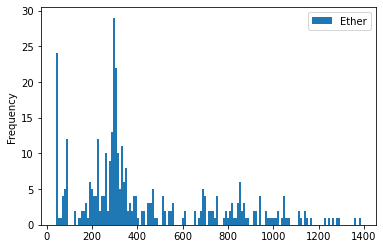

In [187]:
df_cleaned.plot(kind='hist', y='Ether', bins=150)

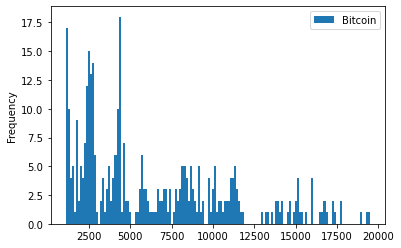

In [188]:
df_cleaned.plot(kind='hist', y='Bitcoin', bins=150)

Using seaborn:

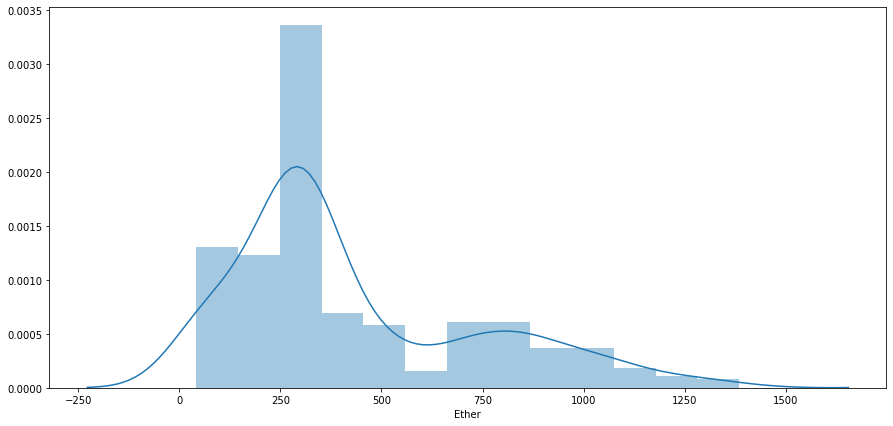

In [189]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Ether'], ax=ax)

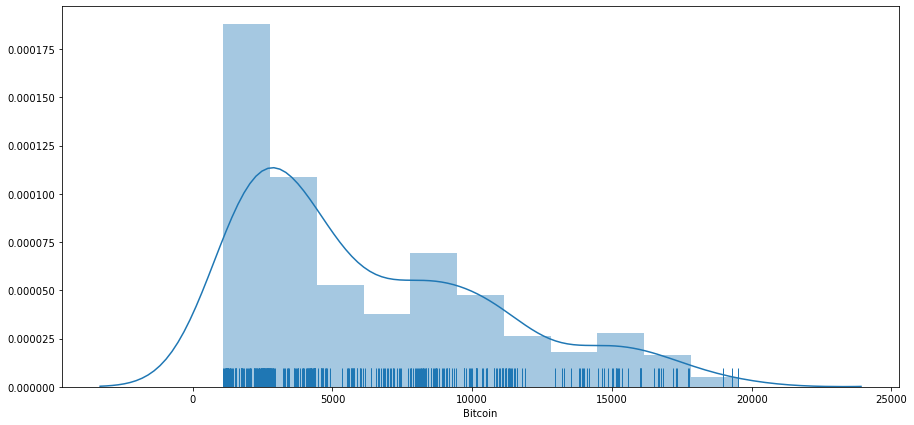

In [190]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], rug=True, ax=ax)

Seaborn's `distplot` is a general method that will plot a histogram, a KDE and a rugplot. You can also use them as separate:

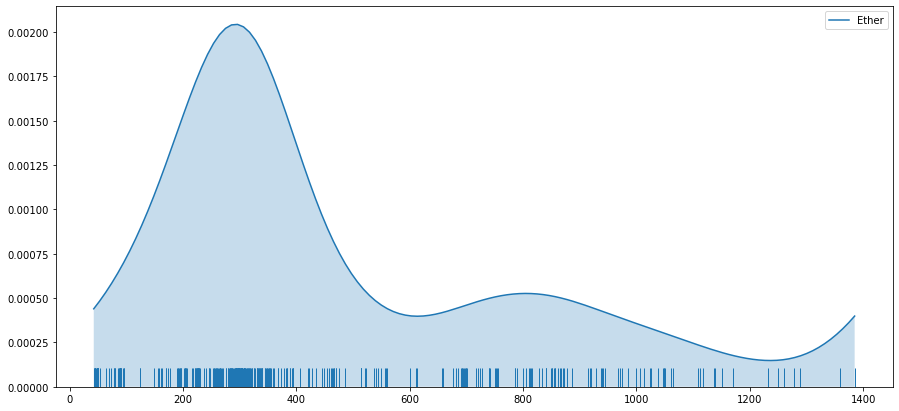

In [191]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.kdeplot(df_cleaned['Ether'], shade=True, cut=0, ax=ax)
sns.rugplot(df_cleaned['Ether'], ax=ax);

We can also visualize a cumulative plot of our distribution:

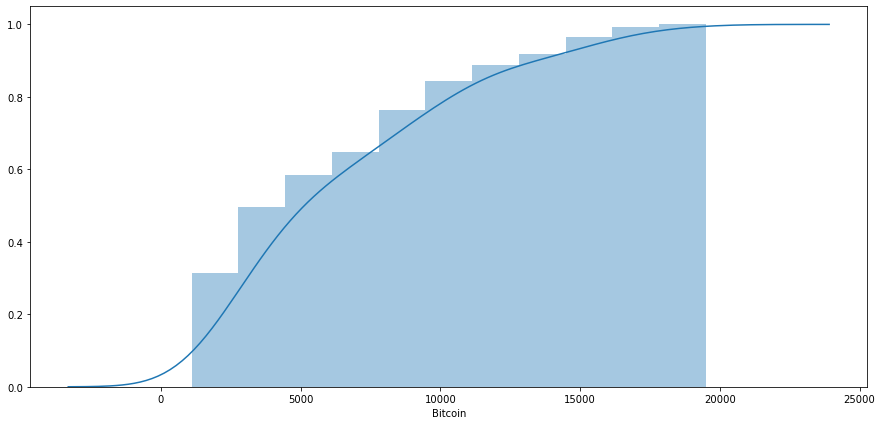

In [192]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


This plot shows how many samples fall behind a certain value. We can increase the number of bins in order to have more detail:

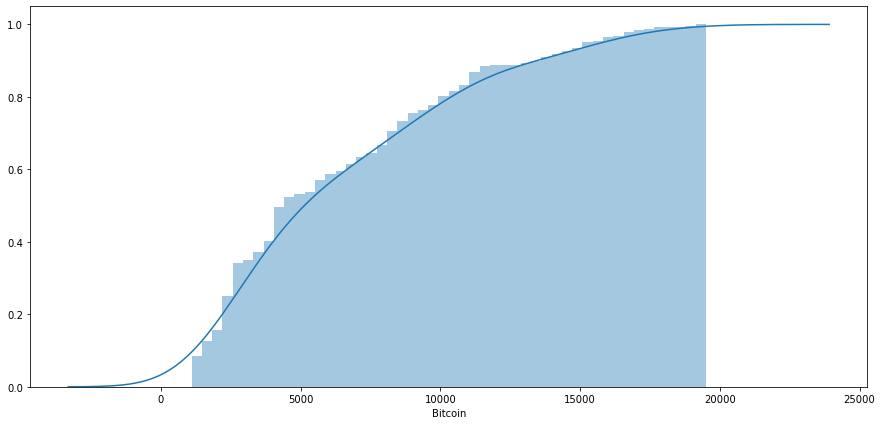

In [193]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))


#### Visualizing bivariate distributions

The most common way to observe a bivariate distribution is a scatterplot, the `jointplot` will also include the distribution of the variables:

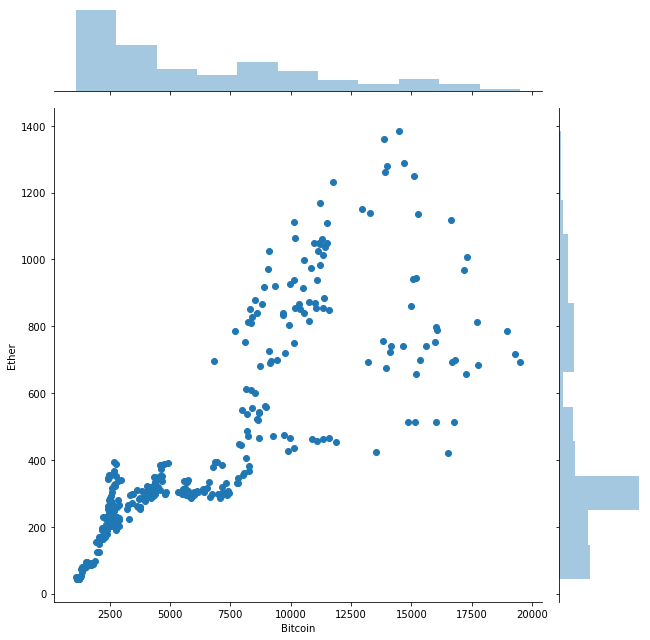

In [194]:
sns.jointplot(x="Bitcoin", y="Ether", data=df_cleaned, height=9)

If you want only a scatter plot, you can use the `regplot` method, that also fits a linear regression model in the plot:

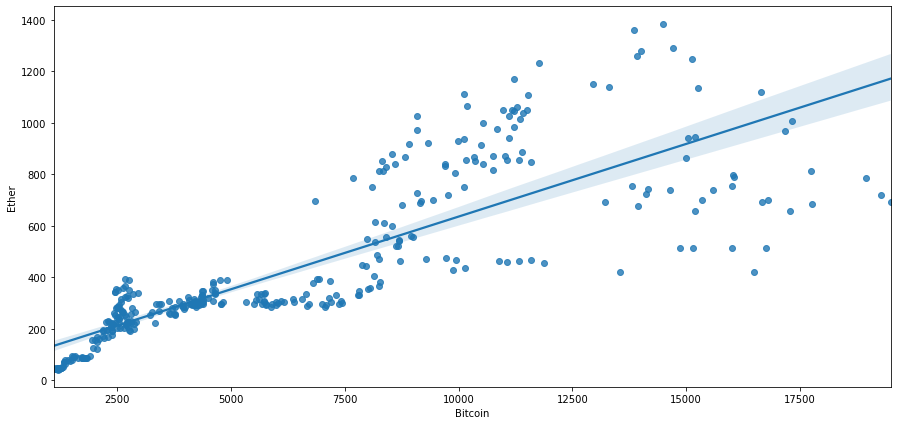

In [195]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x="Bitcoin", y="Ether", data=df_cleaned, ax=ax)

#### Quantiles, quartiles and percentiles

In [196]:
df_cleaned['Bitcoin'].quantile(.2)

2438.8627342857144

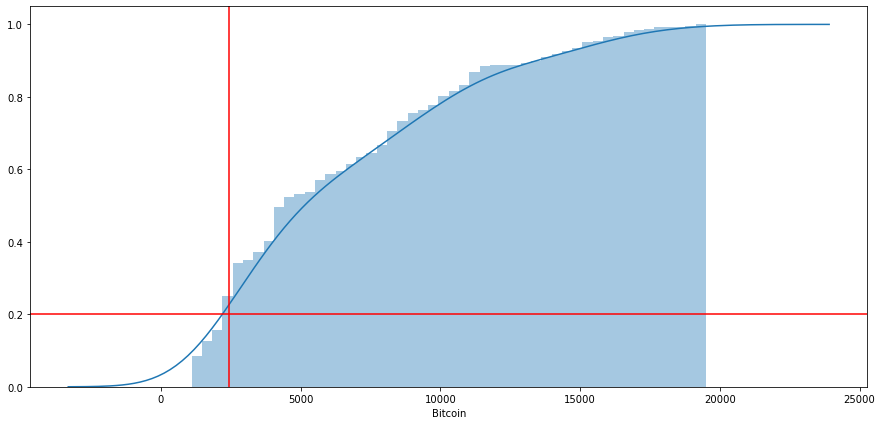

In [197]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.2, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.2), color='red')

In [198]:
df_cleaned['Bitcoin'].quantile(.5)

4580.3874799999985

In [199]:
df_cleaned['Bitcoin'].median()

4580.3874799999985

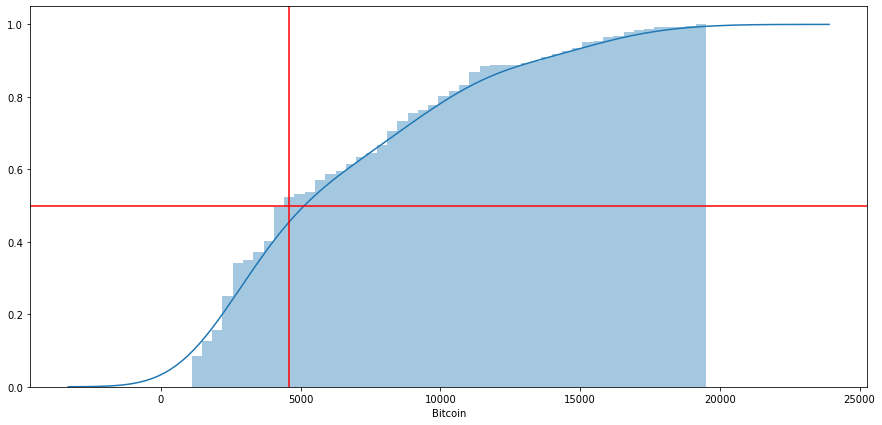

In [200]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].quantile(.5), color='red')

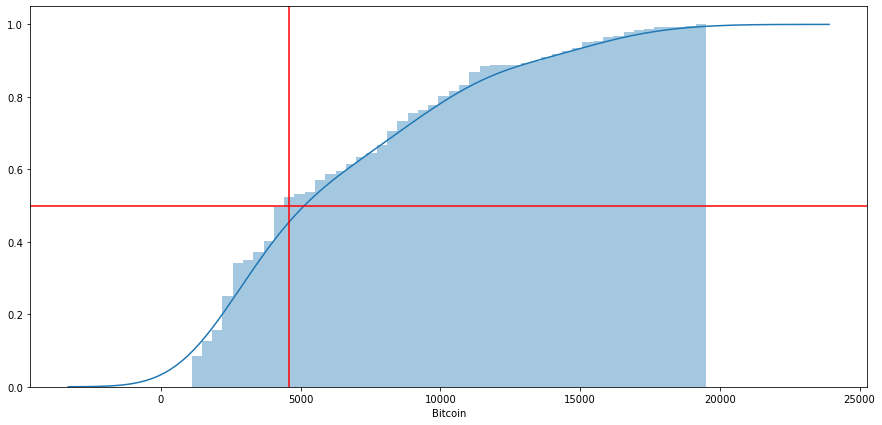

In [201]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df_cleaned['Bitcoin'], ax=ax, bins=50,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))
ax.axhline(0.5, color='red')
ax.axvline(df_cleaned['Bitcoin'].median(), color='red')

Quantile `0.25` == Percentile `25%` == Quartile `1st`

### Dispersion

We'll use a few methods to measure dispersion in our dataset, most of them well known:

* Range
* Variance and Standard Deviation
* IQR

#### Range

Range is fairly simple to understand, it's just the max - min values:

In [202]:
df['Bitcoin'].max() - df['Bitcoin'].min()

142706.6475416667

Range is **really** sensitive to outliers. As you can see, the range value is extremely high (might indicate the presence of outliers / invalid values).

In [203]:
df_cleaned['Bitcoin'].max() - df_cleaned['Bitcoin'].min()

18399.514208333334

This value now makes a lot more sense. We know that Bitcoin had a high in about 20k, and it was around 900 when we started measuring. It makes more sense now.

#### Variance and Standard Deviation

In [204]:
df['Bitcoin'].var()

103766537.75278114

In [205]:
df['Bitcoin'].std()

10186.586167739471

Both variance and std are sensible to outliers as well. We can check with our cleaned dataset:

In [206]:
df_cleaned['Bitcoin'].var()

20374008.23605083

In [207]:
df_cleaned['Bitcoin'].std()

4513.757662530282

#### IQR

The [Interquartile range](https://en.wikipedia.org/wiki/Interquartile_range) is a good measure of "centered" dispersion, and is calculated as `Q3 - Q1` (3rd quartile - 1st quartile).

In [208]:
df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)

6597.494147619047

In [209]:
df_cleaned['Bitcoin'].quantile(.75) - df_cleaned['Bitcoin'].quantile(.25)

6548.249242559523

As you can see, IQR is more robust than std or range, because it's not so sensitive to outliers.

### Analytical Analysis of invalid values

We can now use the measurements we've seen to analyze those values that seem invalid.

#### Using `std`: Z scores

We can now define those values that are a couple of Z scores above or below the mean (or the max/min value). Example:

In [210]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()
lower_limit = df['Bitcoin'].mean() - 2 * df['Bitcoin'].std()

In [211]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 27369.17635730168
Lower Limit: -13377.168313656206


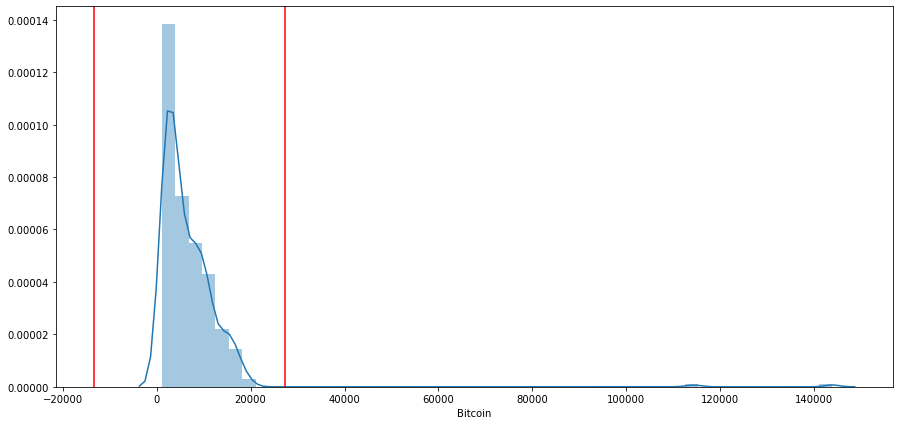

In [212]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Seems like this is a good measurement. Our lower limit doesn't make a lot of sense, as negative values are invalid. But our upper limit has a really good measure. Anything above \$27,369 is considered to be an invalid value. Pretty accurate.

#### Using IQRs

We can use the IQR instead of std if we think that the standard deviation might be **too** affected by the outliers/invalid values.

In [213]:
iqr = df['Bitcoin'].quantile(.75) - df['Bitcoin'].quantile(.25)
iqr

6597.494147619047

In [214]:
upper_limit = df['Bitcoin'].mean() + 2 * iqr
lower_limit = df['Bitcoin'].mean() - 2 * iqr

In [215]:
print("Upper Limit: {}".format(upper_limit))
print("Lower Limit: {}".format(lower_limit))

Upper Limit: 20190.99231706083
Lower Limit: -6198.984273415356


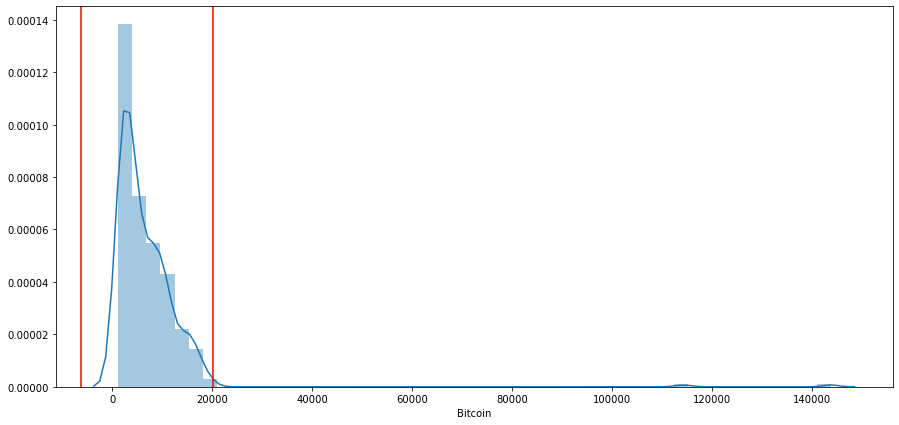

In [216]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.distplot(df['Bitcoin'], ax=ax)
ax.axvline(lower_limit, color='red')
ax.axvline(upper_limit, color='red')

Our measurement now is a little bit less precise. There are a few valid values (20k) that seem to be above our upper limit. Regardless, it's still a good indicator.

#### Cleaning invalid values analytically

It's time now to remove these invalid values analytically, we'll use the upper limit defined by standard deviation:

In [217]:
upper_limit = df['Bitcoin'].mean() + 2 * df['Bitcoin'].std()

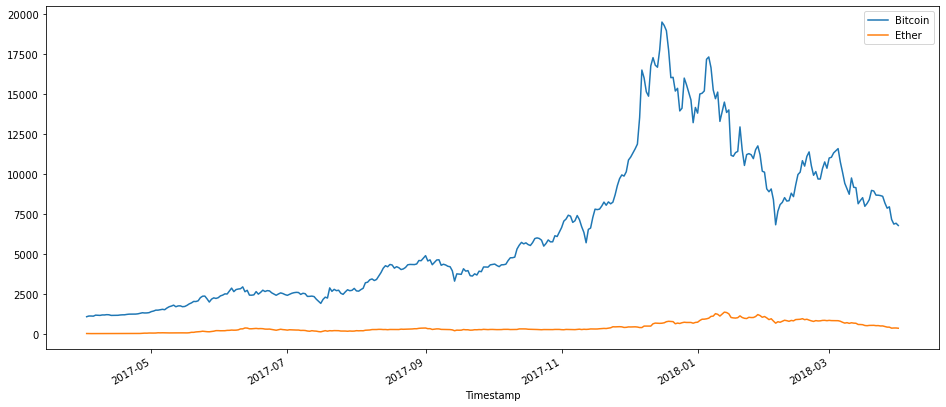

In [218]:
df[df['Bitcoin'] < upper_limit].plot(figsize=(16, 7))

In [ ]:
df.drop(df[df['Bitcoin'] > upper_limit].index).plot(figsize=(16, 7))

![separator2](https://i.imgur.com/4gX5WFr.png)